## Death Rate Data Cleanup and Plotting: Florida

#### In this notebook we are collasping the underlying cause of death dataset from the CDC Wonder Database to create our death rate metric. 
<center> The death rate metric is defined as: </center>
<center> (Deaths/Population)*100,000</center>


#### So, this is the number of people who have an underlying cause of death related to opioids per 100,000 people.

#### After, we are creating the difference-in-difference plots and pre-post plots. 

In [6]:
import pandas as pd
df = pd.read_csv('/workspaces/pds-2022-turquoise-team/20_intermediate_files/florida_all_counties.csv')
df.drop(['Crude Rate'], axis = 1)


/tmp/ipykernel_23188/1328985848.py:2: DtypeWarning: Columns (2,4,6,7,10,11,12,20) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,Year_x,State_x,State Code_x,County_x,County Code_x,Cause of death,Cause of death Code,Deaths,Population_x,State_Code,County Name,year code combo,State_y,State Code_y,County_y,County Code_y,Year_y,Year Code,Population_y
0,32.0,2007.0,Arkansas,5.0,"Garland County, AR",5051.0,Poisoning by and exposure to other and unspeci...,Y14,12.0,94753.0,AR,Garland County,7058.0,Arkansas,5,"Dallas County, AR",5039,2019,2019,7009
1,32.0,2007.0,Arkansas,5.0,"Garland County, AR",5051.0,Poisoning by and exposure to other and unspeci...,Y14,12.0,94753.0,AR,Garland County,7058.0,Arkansas,5,"Desha County, AR",5041,2017,2017,11764
2,32.0,2007.0,Arkansas,5.0,"Garland County, AR",5051.0,Poisoning by and exposure to other and unspeci...,Y14,12.0,94753.0,AR,Garland County,7058.0,Arkansas,5,"Drew County, AR",5043,2015,2015,18778
3,32.0,2007.0,Arkansas,5.0,"Garland County, AR",5051.0,Poisoning by and exposure to other and unspeci...,Y14,12.0,94753.0,AR,Garland County,7058.0,Arkansas,5,"Faulkner County, AR",5045,2013,2013,119580
4,32.0,2007.0,Arkansas,5.0,"Garland County, AR",5051.0,Poisoning by and exposure to other and unspeci...,Y14,12.0,94753.0,AR,Garland County,7058.0,Arkansas,5,"Franklin County, AR",5047,2011,2011,18047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,58062.0,Wyoming,56,"Weston County, WY",56045,2017,2017,6927
82295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,58063.0,Wyoming,56,"Washakie County, WY",56043,2020,2020,7760
82296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,58063.0,Wyoming,56,"Weston County, WY",56045,2018,2018,6967
82297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,58064.0,Wyoming,56,"Weston County, WY",56045,2019,2019,6927


In [7]:
#df['State'].unique()

#### Here we are seperating the dataframe into three dataframes: one for Texas, Washington, and Florida. Only the states we have selected as comparison states are put into their respective dataframes. 

In [8]:

we_want_florida = ['California', 'Nevada', 'New York', 'Texas']


df_florida = df[df['State_y'].isin(we_want_florida)]

In [9]:
df_florida

,Unnamed: 0,Year_x,State_x,State Code_x,County_x,County Code_x,Cause of death,Cause of death Code,Deaths,Population_x,...,State_Code,County Name,year code combo,State_y,State Code_y,County_y,County Code_y,Year_y,Year Code,Population_y
44,36.0,2007.0,California,6.0,"Alameda County, CA",6001.0,Accidental poisoning by and exposure to antiep...,X41,17.0,1455715.0,...,CA,Alameda County,8008.0,California,6,"Alameda County, CA",6001,2007,2007,1455715
45,36.0,2007.0,California,6.0,"Alameda County, CA",6001.0,Accidental poisoning by and exposure to antiep...,X41,17.0,1455715.0,...,CA,Alameda County,8008.0,California,6,"Amador County, CA",6005,2003,2003,36994
46,36.0,2007.0,California,6.0,"Alameda County, CA",6001.0,Accidental poisoning by and exposure to antiep...,X41,17.0,1455715.0,...,CA,Alameda County,8008.0,California,6,"Butte County, CA",6007,2001,2001,206193
47,36.0,2007.0,California,6.0,"Alameda County, CA",6001.0,Accidental poisoning by and exposure to antiep...,X41,17.0,1455715.0,...,CA,Alameda County,8008.0,California,6,"Calaveras County, CA",6009,1999,1999,40000
48,37.0,2007.0,California,6.0,"Alameda County, CA",6001.0,Accidental poisoning by and exposure to narcot...,X42,44.0,1455715.0,...,CA,Alameda County,8008.0,California,6,"Alameda County, CA",6001,2007,2007,1455715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,50524.0,Texas,48,"Zavala County, TX",48507,2017,2017,11948
74988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,50525.0,Texas,48,"Zapata County, TX",48505,2020,2020,14172
74989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,50525.0,Texas,48,"Zavala County, TX",48507,2018,2018,11983
74990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,50526.0,Texas,48,"Zavala County, TX",48507,2019,2019,11840


In [10]:
df_florida = df_florida.drop(columns = ['State_x', 'County Code_x', 'State Code_x', 'County_x', 'Year_x', 'Population_x'])

In [11]:
df_florida['Population_y'] = df_florida['Population_y'].astype('int')

#### Below we are grouped each data frame on the year. We do this to have a single death rate per year. 

In [12]:
df_florida

,Unnamed: 0,Cause of death,Cause of death Code,Deaths,Crude Rate,State_Code,County Name,year code combo,State_y,State Code_y,County_y,County Code_y,Year_y,Year Code,Population_y
44,36.0,Accidental poisoning by and exposure to antiep...,X41,17.0,Unreliable,CA,Alameda County,8008.0,California,6,"Alameda County, CA",6001,2007,2007,1455715
45,36.0,Accidental poisoning by and exposure to antiep...,X41,17.0,Unreliable,CA,Alameda County,8008.0,California,6,"Amador County, CA",6005,2003,2003,36994
46,36.0,Accidental poisoning by and exposure to antiep...,X41,17.0,Unreliable,CA,Alameda County,8008.0,California,6,"Butte County, CA",6007,2001,2001,206193
47,36.0,Accidental poisoning by and exposure to antiep...,X41,17.0,Unreliable,CA,Alameda County,8008.0,California,6,"Calaveras County, CA",6009,1999,1999,40000
48,37.0,Accidental poisoning by and exposure to narcot...,X42,44.0,3.0,CA,Alameda County,8008.0,California,6,"Alameda County, CA",6001,2007,2007,1455715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74987,NaN,NaN,NaN,5.0,NaN,NaN,NaN,50524.0,Texas,48,"Zavala County, TX",48507,2017,2017,11948
74988,NaN,NaN,NaN,5.0,NaN,NaN,NaN,50525.0,Texas,48,"Zapata County, TX",48505,2020,2020,14172
74989,NaN,NaN,NaN,5.0,NaN,NaN,NaN,50525.0,Texas,48,"Zavala County, TX",48507,2018,2018,11983
74990,NaN,NaN,NaN,5.0,NaN,NaN,NaN,50526.0,Texas,48,"Zavala County, TX",48507,2019,2019,11840


In [13]:
groupedby_df_florida = df_florida.groupby(["Year_y"]).sum() # we feel that sum is the most accurate function to use
groupedby_df_florida = groupedby_df_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

groupedby_df_florida

groupedby_df_florida['Death Rate'] = (groupedby_df_florida['Deaths']/groupedby_df_florida['Population_y'])*100_000

/tmp/ipykernel_23188/2102302243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


#### These are the final dataframes with a death rate per 100,000 people per year. 

In [14]:
groupedby_df_florida

,Year_y,Unnamed: 0,Deaths,year code combo,State Code_y,County Code_y,Year Code,Population_y,Death Rate
0,1999,939515.0,20049.0,23796481.0,22234,22339210,1457271,220391472,9.096994
1,2000,1347267.0,20001.0,23710131.0,22138,22242131,1468000,220051286,9.089245
2,2001,942478.0,20388.0,23916913.0,22346,22450180,1466733,240753233,8.468422
3,2002,1334935.0,19624.0,23617565.0,22052,22156105,1461460,225547662,8.700600
4,2003,945202.0,20472.0,24018709.0,22436,22540495,1478214,228004342,8.978776
5,2004,1327894.0,19572.0,23572546.0,22004,22107622,1464924,245604049,7.968924
6,2005,912770.0,19762.0,23469791.0,21916,22018171,1451620,210940958,9.368498
7,2006,1349078.0,19951.0,23711430.0,22134,22237020,1474410,230391654,8.659602
8,2007,963004.0,20588.0,24102727.0,22512,22615540,1487187,400337039,5.142667
9,2008,1379448.0,20261.0,23982888.0,22388,22490944,1491944,375397574,5.397211


In [15]:

we_want_only_florida = ['Florida']

df_only_florida = df[df['State_y'].isin(we_want_only_florida)]

In [16]:
df_only_florida = df_only_florida.drop(columns = ['State_x', 'County Code_x', 'State Code_x', 'County_x', 'Year_x', 'Population_x'])

In [17]:
df_only_florida['Population_y'] = df_only_florida['Population_y'].astype(int)

In [18]:
df_only_florida

,Unnamed: 0,Cause of death,Cause of death Code,Deaths,Crude Rate,State_Code,County Name,year code combo,State_y,State Code_y,County_y,County Code_y,Year_y,Year Code,Population_y
2066,149.0,Accidental poisoning by and exposure to narcot...,X42,20.0,12.1,FL,Bay County,14012.0,Florida,12,"Alachua County, FL",12001,2011,2011,249365
2067,149.0,Accidental poisoning by and exposure to narcot...,X42,20.0,12.1,FL,Bay County,14012.0,Florida,12,"Baker County, FL",12003,2009,2009,27124
2068,149.0,Accidental poisoning by and exposure to narcot...,X42,20.0,12.1,FL,Bay County,14012.0,Florida,12,"Bay County, FL",12005,2007,2007,165345
2069,149.0,Accidental poisoning by and exposure to narcot...,X42,20.0,12.1,FL,Bay County,14012.0,Florida,12,"Bradford County, FL",12007,2005,2005,28098
2070,149.0,Accidental poisoning by and exposure to narcot...,X42,20.0,12.1,FL,Bay County,14012.0,Florida,12,"Brevard County, FL",12009,2003,2003,504847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27485,NaN,NaN,NaN,5.0,NaN,NaN,NaN,14150.0,Florida,12,"Washington County, FL",12133,2017,2017,24567
27486,NaN,NaN,NaN,5.0,NaN,NaN,NaN,14151.0,Florida,12,"Walton County, FL",12131,2020,2020,76648
27487,NaN,NaN,NaN,5.0,NaN,NaN,NaN,14151.0,Florida,12,"Washington County, FL",12133,2018,2018,24880
27488,NaN,NaN,NaN,5.0,NaN,NaN,NaN,14152.0,Florida,12,"Washington County, FL",12133,2019,2019,25473


In [19]:
groupedby_df_only_florida = df_only_florida.groupby(["Year_y"]).sum() 
groupedby_df_only_florida = groupedby_df_only_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_florida['Death Rate'] = (groupedby_df_only_florida['Deaths']/groupedby_df_only_florida['Population_y'])*100_000

/tmp/ipykernel_23188/3131990231.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [20]:
groupedby_df_only_florida.dtypes

Year_y               int64
Unnamed: 0         float64
Deaths             float64
year code combo    float64
State Code_y         int64
County Code_y        int64
Year Code            int64
Population_y         int64
Death Rate         float64
dtype: object

### Adding years since policy implementation 

In [21]:
groupedby_df_only_florida

,Year_y,Unnamed: 0,Deaths,year code combo,State Code_y,County Code_y,Year Code,Population_y,Death Rate
0,1999,330714.0,6848.0,2928243.0,2496,2512451,415792,49949072,13.709964
1,2000,452419.0,6645.0,2984377.0,2544,2560377,424000,45509682,14.601289
2,2001,331894.0,6881.0,2914459.0,2484,2500252,414207,41557600,16.557742
3,2002,453204.0,6764.0,3012840.0,2568,2584412,428428,45313597,14.927087
4,2003,331161.0,6942.0,2914758.0,2484,2500137,414621,51212467,13.555293
5,2004,456362.0,6849.0,3041321.0,2592,2608457,432864,56270968,12.171463
6,2005,345214.0,7114.0,2999357.0,2556,2572292,427065,63187467,11.258562
7,2006,471942.0,6984.0,3069733.0,2616,2632425,437308,65031320,10.739441
8,2007,350947.0,7251.0,3069899.0,2616,2632373,437526,96269978,7.531943
9,2008,477199.0,7090.0,3140215.0,2676,2692431,447784,103113931,6.875890


In [22]:
groupedby_df_florida

,Year_y,Unnamed: 0,Deaths,year code combo,State Code_y,County Code_y,Year Code,Population_y,Death Rate
0,1999,939515.0,20049.0,23796481.0,22234,22339210,1457271,220391472,9.096994
1,2000,1347267.0,20001.0,23710131.0,22138,22242131,1468000,220051286,9.089245
2,2001,942478.0,20388.0,23916913.0,22346,22450180,1466733,240753233,8.468422
3,2002,1334935.0,19624.0,23617565.0,22052,22156105,1461460,225547662,8.700600
4,2003,945202.0,20472.0,24018709.0,22436,22540495,1478214,228004342,8.978776
5,2004,1327894.0,19572.0,23572546.0,22004,22107622,1464924,245604049,7.968924
6,2005,912770.0,19762.0,23469791.0,21916,22018171,1451620,210940958,9.368498
7,2006,1349078.0,19951.0,23711430.0,22134,22237020,1474410,230391654,8.659602
8,2007,963004.0,20588.0,24102727.0,22512,22615540,1487187,400337039,5.142667
9,2008,1379448.0,20261.0,23982888.0,22388,22490944,1491944,375397574,5.397211


In [23]:
def label_row(row): 
    if row['Year_y'] == 2007:
        return -3
    if row['Year_y'] == 2008: 
        return -2
    if row['Year_y'] == 2009:
        return -1
    if row['Year_y'] == 2010: 
        return 0
    if row['Year_y'] == 2011: 
        return 1
    if row['Year_y'] == 2012: 
        return 2
groupedby_df_only_florida['Years since policy'] = groupedby_df_only_florida.apply (lambda row: label_row(row), axis = 1) 




groupedby_df_florida['Years since policy'] = groupedby_df_florida.apply (lambda row: label_row(row), axis = 1) 


In [29]:
florida_policy_control

,Year_y,Unnamed: 0,Deaths,year code combo,State Code_y,County Code_y,Year Code,Population_y,Death Rate,Years since policy,Policy or Control
0,1999,939515.0,20049.0,23796481.0,22234,22339210,1457271,220391472,9.096994,NaN,Control
1,2000,1347267.0,20001.0,23710131.0,22138,22242131,1468000,220051286,9.089245,NaN,Control
2,2001,942478.0,20388.0,23916913.0,22346,22450180,1466733,240753233,8.468422,NaN,Control
3,2002,1334935.0,19624.0,23617565.0,22052,22156105,1461460,225547662,8.700600,NaN,Control
4,2003,945202.0,20472.0,24018709.0,22436,22540495,1478214,228004342,8.978776,NaN,Control
5,2004,1327894.0,19572.0,23572546.0,22004,22107622,1464924,245604049,7.968924,NaN,Control
6,2005,912770.0,19762.0,23469791.0,21916,22018171,1451620,210940958,9.368498,NaN,Control
7,2006,1349078.0,19951.0,23711430.0,22134,22237020,1474410,230391654,8.659602,NaN,Control
8,2007,963004.0,20588.0,24102727.0,22512,22615540,1487187,400337039,5.142667,-3.0,Control
9,2008,1379448.0,20261.0,23982888.0,22388,22490944,1491944,375397574,5.397211,-2.0,Control


## Plotting

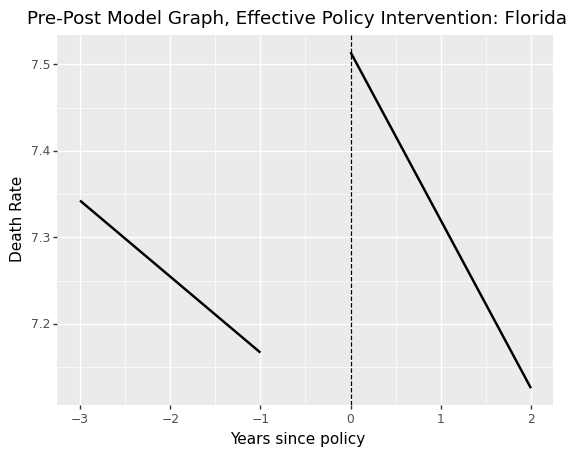

In [24]:
from plotnine import *
g = (
    ggplot(groupedby_df_only_florida, aes(x="Years since policy", y="Death Rate"))
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_florida[groupedby_df_only_florida["Years since policy"] < 0],
        se=False,
    )
    + geom_smooth(
        method="lm",
        data=groupedby_df_only_florida[groupedby_df_only_florida["Years since policy"] >= 0],
        se=False,
    )

    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=6.1, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph, Effective Policy Intervention: Florida") 
)
#g.save("images/prepost_successful.pdf")
print(g)

#### Difference in Difference

In [25]:
groupedby_df_only_florida['Policy or Control'] = 'Policy'


In [26]:
groupedby_df_florida['Policy or Control'] = 'Control'


In [27]:

florida_policy_control = pd.concat([groupedby_df_florida, groupedby_df_only_florida])

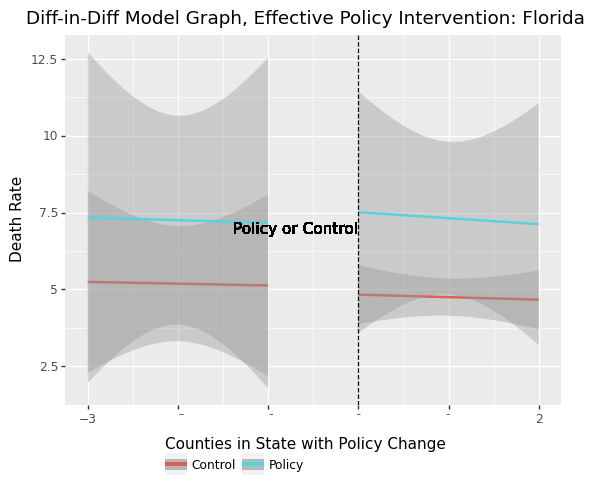

In [28]:
g = (
    ggplot(
        florida_policy_control,
        aes(x="Years since policy", y="Death Rate", color="Policy or Control"),
    )
    + geom_smooth(
        method="lm", data=florida_policy_control[florida_policy_control["Years since policy"] < 0]
    )
    + geom_smooth(
        method="lm", data=florida_policy_control[florida_policy_control["Years since policy"] >= 0]
    )
    + geom_vline(xintercept=0, linetype="dashed")
    + geom_text(x=-0.7, y=7, label="Policy or Control", color="black")
    + labs(
        title="Diff-in-Diff Model Graph, Effective Policy Intervention: Florida",
        color="Counties in State with Policy Change",
    )
    + theme(legend_position="bottom")
)
#g.save("images/diffindiff_successful.pdf")
print(g)